<a href="https://colab.research.google.com/github/arjunverma2004/CampusX-100-Days-of-Deep-Learning/blob/main/Practice_code/Ch11_Q8b_CIFAR10_dataset_prac_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using Nadam optimization and early stopping, train the network
on the CIFAR10 dataset. You can load it with
tf.keras.datasets.cifar10.load_data(). The dataset is
composed of 60,000 32 × 32–pixel color images (50,000 for
training, 10,000 for testing) with 10 classes, so you’ll need a
softmax output layer with 10 neurons. Remember to search for
the right learning rate each time you change the model’s
architecture or hyperparameters.



In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

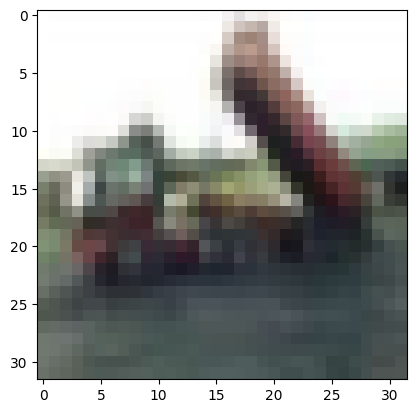

In [5]:
plt.imshow(X_train[2])

In [6]:
from tensorflow.keras.layers import Dropout

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(Dense(500,activation="swish",kernel_initializer="he_normal"))
    model.add(Dropout(0.3))
model.add(Dense(10,activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [9]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,
                                                     restore_best_weights=True, verbose=True)

In [10]:
history = model.fit(X_train, y_train, epochs=100,batch_size=64,
          validation_split=0.2,
          callbacks=early_stopping_cb)

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.1027 - loss: 500.0664 - val_accuracy: 0.0980 - val_loss: 2.3339
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.1043 - loss: 3.6016 - val_accuracy: 0.0980 - val_loss: 2.3316
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.1023 - loss: 2.6323 - val_accuracy: 0.0980 - val_loss: 2.3303
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.1058 - loss: 2.4564 - val_accuracy: 0.0980 - val_loss: 2.3463
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.1074 - loss: 2.3894 - val_accuracy: 0.0980 - val_loss: 2.3598
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.1092 - loss: 2.3472 - val_accuracy: 0.0980 - val_loss: 2.3624
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.1131 - loss: 2.3296 - val_accuracy: 0.0980 - val_loss: 2.3590
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.1157 - loss: 2.

###Model 2

In [11]:
from tensorflow.keras.layers import BatchNormalization

In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("swish"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,
                                                     restore_best_weights=True)
history2=model.fit(X_train, y_train, epochs=100,batch_size=64,
          validation_split=0.2,
          callbacks=early_stopping_cb)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - accuracy: 0.1726 - loss: 2.2720 - val_accuracy: 0.2845 - val_loss: 2.0239
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3393 - loss: 1.8179 - val_accuracy: 0.3697 - val_loss: 1.7397
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3934 - loss: 1.6737 - val_accuracy: 0.3615 - val_loss: 1.8354
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.4332 - loss: 1.5790 - val_accuracy: 0.3779 - val_loss: 1.7471
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4613 - loss: 1.5162 - val_accuracy: 0.3972 - val_loss: 1.6580
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4826 - loss: 1.4506 - val_accuracy: 0.4032 - val_loss: 1.7280
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4963 - loss: 1.4109 - val_accuracy: 0.3994 - val_loss: 1.6965
Epoch 8/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.5188 - loss: 1.3638 - val_

In [18]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4780 - loss: 1.4708


[1.483880639076233, 0.47290000319480896]

In [16]:
y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


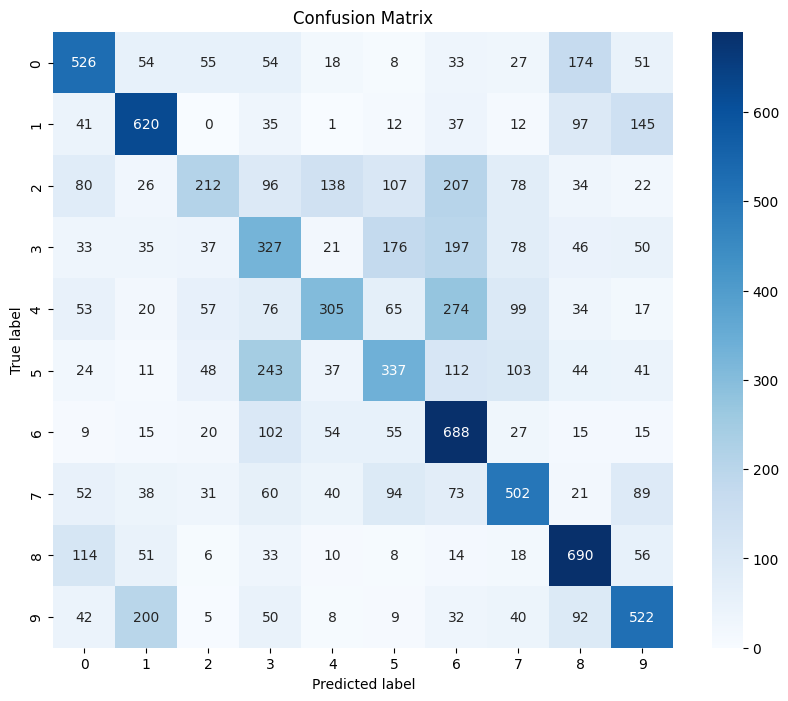

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Convert predicted probabilities to predicted class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix using true labels and predicted class labels
cm = confusion_matrix(y_test, y_pred_classes)

# You can optionally display the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

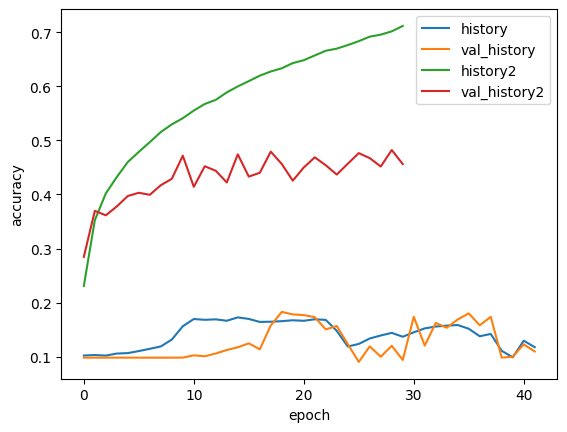

In [24]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.plot(history2.history["accuracy"])
plt.plot(history2.history["val_accuracy"])
plt.legend(["history","val_history","history2","val_history2"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()